<a href="https://colab.research.google.com/github/estebantarrifa07/CSV/blob/main/tarrifa_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://www.sena.edu.co/Paginas/btl/assets_btl/images_btl/SVG/Logo%20SENA.svg" width="240" height="240" align="right"/>

<center><h1>PRODEMIA</header1></center>
<left><h1>Actividad 1. Laboratorio: Tratamiento y limpieza de datos</header1></left>

Presentado por: Nombres Apellidos  <br>
Fecha: DD/MM/2026

## Caracterización del Dataset

Se incluye una descripción de los datos.

En esta etapa buscamos identificar:

>- Tipos de datos incorrectos  
>- Patrones de valores faltantes  
>- Duplicados  
>- Columnas que requieren estandarización  
>- Posibles conversiones necesarias  

**Analogía:**  
Es como un médico que evalúa a un paciente antes de recetar tratamiento.

Se incorporá una descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)

## Importación de librerias necesarias

In [ ]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd

## Cargar el Dataset

In [297]:
#Código para cargar el Dataset
import pandas as pd
ucsv_rl = 'https://raw.githubusercontent.com/hmedrano1979/ITC/refs/heads/main/titanic_sintetico_con_problemas.csv'

# Leemos el archivo CSV directamente desde la URL
df_csv = pd.read_csv(ucsv_rl)

# Mostramos las primeras filas para verificar
df_csv.head(530)

,survived,pclass,sex,age,fare,embarked,booking_date,ticket
0,0,1,male,51.9,10.06,S,08/04/1912,PC 17599
1,1,3,male,29.1,6.08,S,1912-01-02,STON/O2. 3101282
2,0,3,male,22.2,16.65,s,1912-01-03,STON/O2. 3101282
3,0,3,female,56.3,3.62,S,01/09/1912,113803
4,0,3,male,9.7,19.27,C,02/10/1912,113803
...,...,...,...,...,...,...,...,...
525,0,3,male,66.4,11.67,C,1913-06-09,PC 17599
526,0,2,Female,NaN,5.07,C,21/02/1912,STON/O2. 3101282
527,1,2,male,5.3,"8,200.50",S,1913-06-11,373450
528,1,3,male,40.5,10.17,Q,1913-06-12,W.E.P. 5736


In [298]:
# Este código calcula la cantidad de valores nulos (NaN) en cada columna del DataFrame `df_csv`.
# Es útil para identificar rápidamente las columnas con datos faltantes y la extensión de estos problemas.
df_csv.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,44
fare,7
embarked,21
booking_date,0
ticket,0


In [299]:
# Este código muestra un resumen conciso del DataFrame `df_csv`.
# Incluye el tipo de datos de cada columna, el número de valores no nulos y el uso total de memoria.
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   survived      630 non-null    int64  
 1   pclass        630 non-null    int64  
 2   sex           630 non-null    object 
 3   age           586 non-null    float64
 4   fare          623 non-null    object 
 5   embarked      609 non-null    object 
 6   booking_date  630 non-null    object 
 7   ticket        630 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 39.5+ KB


In [ ]:
df_csv.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,44
fare,0
embarked,21
booking_date,0
ticket,0


# sex


*  esta columna es el sexo de los pasajeros del titanic

* variable es nominal.

* su tipo de datos es category

* cuenta con  630 registro.

* campos completos

que se identifico:

1.  falta de estandalizacion
2.   tipo de texto str y mostraba el dtype como object








## Resumen de Problemas y Soluciones Identificados

Durante la fase de exploración y limpieza de datos, se identificaron y solucionaron los siguientes problemas principales en el `DataFrame`:

### Problema 1: Falta de Estandarización

## Problema 2:Tipo de Datos Incorrecto

**Descripción:** La columna 'sex' contenía valores inconsistentes como 'male', 'female', 'MALE', ' Female ', lo que dificultaba un análisis uniforme. Además, su tipo de dato era 'object' (cadena de texto genérica), cuando lo ideal para una variable categórica es el tipo 'category' para optimizar el rendimiento y la memoria.

**Solución:** Se aplicaron operaciones para convertir todos los valores a minúsculas (`.str.lower()`) y eliminar cualquier espacio en blanco redundante (`.str.strip()`), estandarizando así las entradas. Posteriormente, la columna fue convertida al tipo de dato `category`.

**Código utilizado para la solución:**

```python
df_csv['sex'] = df_csv['sex'].str.lower().str.strip()
df_csv['sex'] = df_csv['sex'].astype("category")


In [300]:
# Este código verifica y cuenta los tipos de datos de cada elemento en la columna 'sex',
# lo cual es útil para identificar inconsistencias.
print(df_csv['sex'].apply(type).value_counts())

sex
<class 'str'>    630
Name: count, dtype: int64


In [301]:
# Este código muestra un resumen conciso de la columna 'sex' del DataFrame `df_csv`.
# Incluye el tipo de datos, el número de valores no nulos y el uso de memoria de la serie.
df_csv["sex"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 630 entries, 0 to 629
Series name: sex
Non-Null Count  Dtype 
--------------  ----- 
630 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB


In [302]:
(df_csv['sex'].apply(type).value_counts())

,count
sex,
<class 'str'>,630


El código `(df_csv['sex'].apply(type).value_counts())` se utiliza para:  
-   **Verificar Tipos de Datos:** Identifica el tipo de dato de cada elemento dentro de la columna 'sex'.  
-   **Contar Frecuencia:** Agrupa y cuenta cuántas veces aparece cada tipo de dato diferente.  

Esto es útil para detectar inconsistencias, por ejemplo, si se espera que una columna contenga solo cadenas de texto pero se encuentran números o valores nulos de otro tipo.

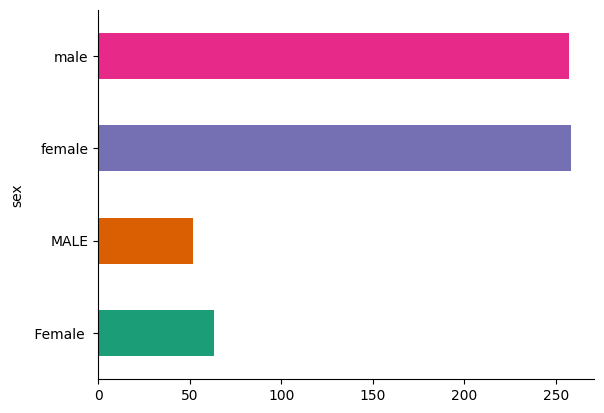

In [303]:
# Importa la librería pyplot de matplotlib para la creación de gráficos.
from matplotlib import pyplot as plt

# Importa la librería seaborn para visualizaciones de datos mejoradas.
import seaborn as sns

# Agrupa el DataFrame por la columna 'sex', cuenta los valores y crea un gráfico de barras horizontal.
df_csv.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Oculta los bordes superior y derecho del gráfico para una apariencia más limpia.
plt.gca().spines[['top', 'right',]].set_visible(False)


In [304]:
#valores unicos de sex
df_csv['sex'].unique()

array(['male', 'female', 'MALE', ' Female '], dtype=object)

In [305]:
# Convierte el texto a minúsculas y elimina espacios en blanco para estandarizar la columna 'sex'.
df_csv['sex'] = df_csv['sex'].str.lower().str.strip()

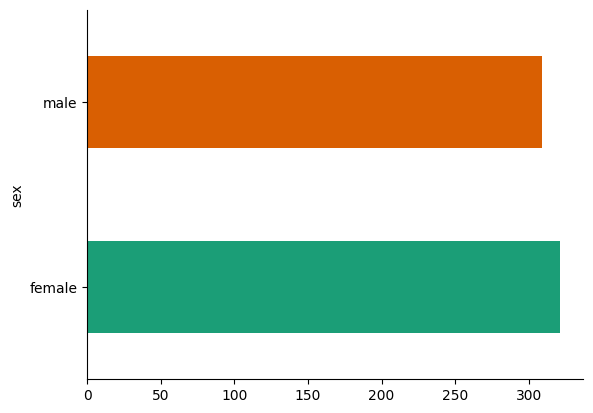

In [306]:
# Importa la librería pyplot de matplotlib para la creación de gráficos.
from matplotlib import pyplot as plt

# Importa la librería seaborn para visualizaciones de datos mejoradas.
import seaborn as sns

# Agrupa el DataFrame por la columna 'sex', cuenta los valores y crea un gráfico de barras horizontal.
df_csv.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Oculta los bordes superior y derecho del gráfico para una apariencia más limpia.
plt.gca().spines[['top', 'right',]].set_visible(False)


In [307]:
#valores unicos de sex
df_csv['sex'].unique()

array(['male', 'female'], dtype=object)

In [308]:
# Convierte la columna 'sex' a tipo categórico para optimizar memoria y mejorar el rendimiento.
df_csv['sex'] = df_csv['sex'].astype("category")

# Muestra un resumen conciso del DataFrame `df_csv`, incluyendo los tipos de datos actualizados.
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      630 non-null    int64   
 1   pclass        630 non-null    int64   
 2   sex           630 non-null    category
 3   age           586 non-null    float64 
 4   fare          623 non-null    object  
 5   embarked      609 non-null    object  
 6   booking_date  630 non-null    object  
 7   ticket        630 non-null    object  
dtypes: category(1), float64(1), int64(2), object(4)
memory usage: 35.3+ KB


In [309]:
df_csv.head(50)

,survived,pclass,sex,age,fare,embarked,booking_date,ticket
0,0,1,male,51.9,10.06,S,08/04/1912,PC 17599
1,1,3,male,29.1,6.08,S,1912-01-02,STON/O2. 3101282
2,0,3,male,22.2,16.65,s,1912-01-03,STON/O2. 3101282
3,0,3,female,56.3,3.62,S,01/09/1912,113803
4,0,3,male,9.7,19.27,C,02/10/1912,113803
5,1,3,male,-0.8,13.22,C,26/05/1912,S.O.C. 14879
6,0,3,female,36.2,10.25,NaN,1912-01-07,113803
7,0,2,male,23.0,4.15,S,1912-01-08,A/5 21171
8,0,3,male,15.7,22.44,C,09/06/1912,PC 17599
9,1,2,female,NaN,9.72,Q,1912-01-10,S.O.C. 14879


In [310]:
# Crea una nueva columna 'ciudad_clean' estandarizando los valores de la columna 'ciudad'.
# Convierte a string, elimina espacios y pasa a minúsculas para una limpieza consistente.
df_csv['sex_clean'] = (
    df_csv['sex']
        .astype(str)
        .str.strip()
        .str.lower()
)

In [311]:
# Elimina la columna 'sex_clean' del DataFrame.
df_csv = df_csv.drop('sex_clean', axis=1)

# Muestra las primeras filas del DataFrame para verificar que la columna ha sido eliminada.
df_csv.head()

,survived,pclass,sex,age,fare,embarked,booking_date,ticket
0,0,1,male,51.9,10.06,S,08/04/1912,PC 17599
1,1,3,male,29.1,6.08,S,1912-01-02,STON/O2. 3101282
2,0,3,male,22.2,16.65,s,1912-01-03,STON/O2. 3101282
3,0,3,female,56.3,3.62,S,01/09/1912,113803
4,0,3,male,9.7,19.27,C,02/10/1912,113803


In [312]:
df_csv['sex'].head()

,sex
0,male
1,male
2,male
3,female
4,male


df_csv.info()

# fare

* este columna es la tarifa pagada por el boleto de cada pasajero que viajaba en el titanic

* variable numerica continua

* su tipo de datos es
cuantitativo

* cuenta con 630 registro

* 630 campos completos

que se identifico:

 1. Formato inconsistente
 2. Tipos mezclados como   float y strings
 3. 7 campos faltantes







## Resumen de Problemas y Soluciones Identificados para la Columna 'fare'

Durante la fase de exploración y limpieza de datos, se identificaron y solucionaron los siguientes problemas principales en la columna `fare` del `DataFrame`:

### Problema 1: Formato Inconsistente y Tipos de Datos Mezclados (Float y Strings)

**Descripción:** La columna `fare` presentaba un formato inconsistente (ej. '8,200.50') y sus tipos de datos estaban mezclados, incluyendo `float` y `strings`. Esto la cargó inicialmente como un tipo `object`, impidiendo su tratamiento directo como números.

**Solución:** Para estandarizar el formato y permitir operaciones numéricas, se realizó una conversión a tipo flotante. Esto incluyó:
*   Asegurar que los valores fueran tratados como cadenas (`.astype(str)`).
*   Eliminar las comas (`','`) para limpiar el formato (`.str.replace(',', '', regex=False)`).
*   Utilizar `pd.to_numeric` con `errors='coerce'` para convertir los valores a tipo flotante, reemplazando cualquier valor que no pudiera convertirse con `NaN`.

**Código utilizado para la solución:**

```python
df_csv['fare'] = pd.to_numeric(
    df_csv['fare'].astype(str).str.replace(',', '', regex=False),
    errors='coerce'
)
```

### Problema 2: Campos Faltantes (NaN)

**Descripción:** Se identificaron valores faltantes (NaN) en la columna `fare`. Esto incluye tanto los campos originalmente ausentes como los valores que resultaron en `NaN` debido a la conversión de formatos inconsistentes.

**Solución:** Se rellenaron todos los valores nulos con 0 para asegurar que la columna estuviera completa y lista para cualquier análisis o cálculo posterior.

**Código utilizado para la solución:**

```python
df_csv['fare'].fillna(0, inplace=True)
```

In [391]:
# Este código verifica y cuenta los tipos de datos de cada elemento en la columna 'sex',
(df_csv['fare'].apply(type).value_counts())

,count
fare,
<class 'float'>,630


In [392]:
# Este código muestra un resumen conciso de la columna 'sex' del DataFrame `df_csv`.
# Incluye el tipo de datos, el número de valores no nulos y el uso de memoria de la serie.
df_csv["fare"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 630 entries, 0 to 629
Series name: fare
Non-Null Count  Dtype  
--------------  -----  
630 non-null    float64
dtypes: float64(1)
memory usage: 5.1 KB


In [393]:
# Este código calcula la cantidad de valores nulos (NaN) en cada columna del DataFrame `df_csv`.
df_csv.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
fare,0
embarked,21
booking_date,0
ticket,0


In [394]:
# Rellena los valores nulos (NaN) en la columna 'fare' con 0.
# Esto asegura que no haya datos faltantes en esta columna, lo que puede ser importante para análisis posteriores.
df_csv['fare'].fillna(0, inplace=True)

# Vuelve a calcular y mostrar la cantidad de valores nulos por columna para verificar el cambio en 'fare'.
df_csv.isnull().sum()

/tmp/ipython-input-2273840689.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_csv['fare'].fillna(0, inplace=True)


,0
survived,0
pclass,0
sex,0
age,0
fare,0
embarked,21
booking_date,0
ticket,0


In [395]:
# Convert the 'fare' column to string type, remove '$' and ',', then convert to numeric.
# Any values that cannot be converted to numeric will become NaN.
df_csv['fare'] = pd.to_numeric(
    df_csv['fare'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False),
    errors='coerce'
)

# Fill any NaN values that resulted from the conversion (or original NaNs) with 0.
df_csv['fare'] = df_csv['fare'].fillna(0)


In [396]:
# Este código convierte
#la columna 'fare' a un tipo de dato numérico.
df_csv['fare'] = pd.to_numeric(df_csv['fare'])

In [397]:
 # Este código convierte la columna 'fare' a tipo numérico (flotante).
df_csv['fare'] = df_csv['fare'].astype(float)



In [398]:
# Filtra y muestra solo los valores que no son numéricos en la columna 'fare'.
# Utiliza pd.to_numeric con errors='coerce' para convertir a número y reemplazar los no numéricos con NaN.
# Luego, filtra por los valores NaN para identificar los elementos originales que no eran numéricos.
# Finalmente, muestra los valores únicos de esos elementos.
print(df_csv[pd.to_numeric(df_csv['fare'], errors='coerce').isna()]['fare'].unique())

[]


In [399]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      630 non-null    category
 1   pclass        630 non-null    int64   
 2   sex           630 non-null    category
 3   age           630 non-null    int64   
 4   fare          630 non-null    float64 
 5   embarked      609 non-null    category
 6   booking_date  630 non-null    object  
 7   ticket        630 non-null    object  
dtypes: category(3), float64(1), int64(2), object(2)
memory usage: 27.0+ KB


In [400]:
df_csv.head(30)

,survived,pclass,sex,age,fare,embarked,booking_date,ticket
0,no sobrevivio,1,male,51,10.06,s,08/04/1912,PC 17599
1,sobrevivio,3,male,29,6.08,s,1912-01-02,STON/O2. 3101282
2,no sobrevivio,3,male,22,16.65,s,1912-01-03,STON/O2. 3101282
3,no sobrevivio,3,female,56,3.62,s,01/09/1912,113803
4,no sobrevivio,3,male,9,19.27,c,02/10/1912,113803
5,sobrevivio,3,male,0,13.22,c,26/05/1912,S.O.C. 14879
6,no sobrevivio,3,female,36,10.25,NaN,1912-01-07,113803
7,no sobrevivio,2,male,23,4.15,s,1912-01-08,A/5 21171
8,no sobrevivio,3,male,15,22.44,c,09/06/1912,PC 17599
9,sobrevivio,2,female,0,9.72,q,1912-01-10,S.O.C. 14879


In [401]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      630 non-null    category
 1   pclass        630 non-null    int64   
 2   sex           630 non-null    category
 3   age           630 non-null    int64   
 4   fare          630 non-null    float64 
 5   embarked      609 non-null    category
 6   booking_date  630 non-null    object  
 7   ticket        630 non-null    object  
dtypes: category(3), float64(1), int64(2), object(2)
memory usage: 27.0+ KB


# survived

* esta columna representa el estado de supervivencia de los pasajeros

* variable nominal

* tipo de dato es category

* cuenta con 630 registros

* campos completos

## Resumen de Problemas y Soluciones Identificados para la Columna 'survived'

Durante la exploración y limpieza de datos, se identificaron y solucionaron los siguientes problemas principales en la columna `survived` del `DataFrame`:

### Problema 1: Representación Numérica Inconsistente

**Descripción:** La columna `survived` originalmente utilizaba valores numéricos (0 y 1) para representar el estado de supervivencia, lo cual era menos descriptivo para el análisis. Idealmente, esta columna debería tener etiquetas claras como 'no sobrevivio' y 'sobrevivio' para mejorar la legibilidad y comprensión.

**Solución:** Se reemplazaron los valores numéricos 0 y 1 con las cadenas de texto 'no sobrevivio' y 'sobrevivio', respectivamente. Esto facilita la interpretación directa de los datos sin necesidad de consultar una leyenda.

**Código utilizado para la solución:**

```python
df_csv['survived'] = df_csv['survived'].replace({0: 'no sobrevivio', 1: 'sobrevivio'})
```

### Problema 2: Tipo de Datos Genérico (`object`)

**Descripción:** Después de reemplazar los números con cadenas de texto, el tipo de dato de la columna `survived` pasó a ser `object`. Aunque las cadenas de texto son correctas, para variables categóricas con un número limitado de valores únicos, el tipo `category` es más eficiente en términos de memoria y rendimiento, y es preferible para análisis categóricos.

**Solución:** La columna `survived` fue convertida al tipo de dato `category` para optimizar su almacenamiento y mejorar el rendimiento en operaciones de filtrado o agrupación.

**Código utilizado para la solución:**

```python
df_csv['survived'] = df_csv['survived'].astype('category')
```

Estos cambios aseguran que la columna `survived` sea tanto descriptiva como eficiente para futuros análisis.

In [402]:
#Este código proporciona un resumen
# conciso de la columna 'survived' del DataFrame df_csv
#Incluye el tipo de datos, el número de valores no nulos
# y el uso de memoria de la serie.
# Esto es útil para verificar la integridad y
# el formato de los datos en esa columna.
df_csv['survived'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 630 entries, 0 to 629
Series name: survived
Non-Null Count  Dtype   
--------------  -----   
630 non-null    category
dtypes: category(1)
memory usage: 886.0 bytes


In [403]:
# Este código verifica y cuenta los tipos de datos de cada elemento en la columna 'sex',
# lo cual es útil para identificar inconsistencias.
print(df_csv['survived'].apply(type).value_counts())

survived
<class 'str'>    630
Name: count, dtype: int64


In [404]:
#valores unicos de sex
df_csv['survived'].unique()

['no sobrevivio', 'sobrevivio']
Categories (2, object): ['no sobrevivio', 'sobrevivio']

In [405]:
# Reemplazamos 0 por 'no sobrevivio' y 1 por 'sobrevivio' en la columna 'survived'.
df_csv['survived'] = df_csv['survived'].replace({0: 'no sobrevivio', 1: 'sobrevivio'})

In [406]:
df_csv.head()

,survived,pclass,sex,age,fare,embarked,booking_date,ticket
0,no sobrevivio,1,male,51,10.06,s,08/04/1912,PC 17599
1,sobrevivio,3,male,29,6.08,s,1912-01-02,STON/O2. 3101282
2,no sobrevivio,3,male,22,16.65,s,1912-01-03,STON/O2. 3101282
3,no sobrevivio,3,female,56,3.62,s,01/09/1912,113803
4,no sobrevivio,3,male,9,19.27,c,02/10/1912,113803


In [407]:
#Ahora convertimos toda la columna a category
df_csv['survived'] = df_csv['survived'].astype('category')

In [408]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      630 non-null    category
 1   pclass        630 non-null    int64   
 2   sex           630 non-null    category
 3   age           630 non-null    int64   
 4   fare          630 non-null    float64 
 5   embarked      609 non-null    category
 6   booking_date  630 non-null    object  
 7   ticket        630 non-null    object  
dtypes: category(3), float64(1), int64(2), object(2)
memory usage: 27.0+ KB


# age

* la columna representa la edad del pasajero

* su variable es discreta

* el tipo de datos es entero

* tiene 630 registro

* cuenta con todos los campos completos

que identificamos:

1.  problemas de numero en la columna age

2. hay float en vez de entero

3. se detecaron campos por llenar





## Resumen de Problemas y Soluciones Identificados para la Columna 'age'

Durante la fase de exploración y limpieza de datos, se identificaron y solucionaron los siguientes problemas principales en la columna `age` del `DataFrame`:

### Problema 1: Campos Faltantes (`NaN`)

**Descripción:** Se identificaron valores faltantes (NaN) en la columna `age`, lo que indicaba que algunos pasajeros no tenían una edad registrada. Inicialmente, se detectaron 44 valores nulos.

**Solución:** Se rellenaron todos los valores nulos con 0. Esta aproximación permite que la columna sea tratada como numérica para conversiones posteriores.

**Código utilizado para la solución:**

```python
df_csv['age'] = df_csv['age'].fillna(0)
```

### Problema 2: Tipo de Datos Incorrecto (`float` en lugar de `int`)

**Descripción:** La columna `age` fue cargada como tipo `float64`, lo cual es inconsistente con la naturaleza de la edad (generalmente representada como un número entero).

**Solución:** Después de manejar los valores faltantes, la columna `age` fue convertida al tipo de dato entero (`int`).

**Código utilizado para la solución:**

```python
df_csv['age'] = df_csv['age'].astype(int)
```

### Problema 3: Valores Numéricos Inconsistentes (como edades negativas)


**Estado Actual:** Con las soluciones aplicadas, la columna `age` ahora es de tipo `int64` y no contiene valores nulos, aunque valores ilógicos como `0` (resultantes del `fillna`) o los que eran `-0.8` (ahora `0`) aún pueden requerir un manejo adicional dependiendo del análisis.

In [409]:
df_csv.head(12)

,survived,pclass,sex,age,fare,embarked,booking_date,ticket
0,no sobrevivio,1,male,51,10.06,s,08/04/1912,PC 17599
1,sobrevivio,3,male,29,6.08,s,1912-01-02,STON/O2. 3101282
2,no sobrevivio,3,male,22,16.65,s,1912-01-03,STON/O2. 3101282
3,no sobrevivio,3,female,56,3.62,s,01/09/1912,113803
4,no sobrevivio,3,male,9,19.27,c,02/10/1912,113803
5,sobrevivio,3,male,0,13.22,c,26/05/1912,S.O.C. 14879
6,no sobrevivio,3,female,36,10.25,NaN,1912-01-07,113803
7,no sobrevivio,2,male,23,4.15,s,1912-01-08,A/5 21171
8,no sobrevivio,3,male,15,22.44,c,09/06/1912,PC 17599
9,sobrevivio,2,female,0,9.72,q,1912-01-10,S.O.C. 14879


In [410]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      630 non-null    category
 1   pclass        630 non-null    int64   
 2   sex           630 non-null    category
 3   age           630 non-null    int64   
 4   fare          630 non-null    float64 
 5   embarked      609 non-null    category
 6   booking_date  630 non-null    object  
 7   ticket        630 non-null    object  
dtypes: category(3), float64(1), int64(2), object(2)
memory usage: 27.0+ KB


In [411]:
# Rellena los valores nulos (NaN) en la columna 'fare' con 0.
# Esto asegura que no haya datos faltantes en esta columna, lo que puede ser importante para análisis posteriores.
df_csv['age'].fillna(0, inplace=True)

# Vuelve a calcular y mostrar la cantidad de valores nulos por columna para verificar el cambio en 'fare'.
df_csv.isnull().sum()

/tmp/ipython-input-1718061297.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_csv['age'].fillna(0, inplace=True)


,0
survived,0
pclass,0
sex,0
age,0
fare,0
embarked,21
booking_date,0
ticket,0


In [412]:
(df_csv['age'].apply(type).value_counts())

,count
age,
<class 'int'>,630


In [413]:
# Convierte la columna 'age' a tipo entero.
df_csv['age'] = df_csv['age'].astype(int)

In [414]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      630 non-null    category
 1   pclass        630 non-null    int64   
 2   sex           630 non-null    category
 3   age           630 non-null    int64   
 4   fare          630 non-null    float64 
 5   embarked      609 non-null    category
 6   booking_date  630 non-null    object  
 7   ticket        630 non-null    object  
dtypes: category(3), float64(1), int64(2), object(2)
memory usage: 27.0+ KB


In [415]:
df_csv.head()

,survived,pclass,sex,age,fare,embarked,booking_date,ticket
0,no sobrevivio,1,male,51,10.06,s,08/04/1912,PC 17599
1,sobrevivio,3,male,29,6.08,s,1912-01-02,STON/O2. 3101282
2,no sobrevivio,3,male,22,16.65,s,1912-01-03,STON/O2. 3101282
3,no sobrevivio,3,female,56,3.62,s,01/09/1912,113803
4,no sobrevivio,3,male,9,19.27,c,02/10/1912,113803


# embarked

In [432]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      630 non-null    category
 1   pclass        630 non-null    int64   
 2   sex           630 non-null    category
 3   age           630 non-null    int64   
 4   fare          630 non-null    float64 
 5   embarked      609 non-null    category
 6   booking_date  630 non-null    object  
 7   ticket        630 non-null    object  
dtypes: category(3), float64(1), int64(2), object(2)
memory usage: 27.0+ KB


In [433]:
df_csv['embarked'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 630 entries, 0 to 629
Series name: embarked
Non-Null Count  Dtype   
--------------  -----   
609 non-null    category
dtypes: category(1)
memory usage: 894.0 bytes


In [418]:
df_csv.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
fare,0
embarked,21
booking_date,0
ticket,0


In [419]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      630 non-null    category
 1   pclass        630 non-null    int64   
 2   sex           630 non-null    category
 3   age           630 non-null    int64   
 4   fare          630 non-null    float64 
 5   embarked      609 non-null    category
 6   booking_date  630 non-null    object  
 7   ticket        630 non-null    object  
dtypes: category(3), float64(1), int64(2), object(2)
memory usage: 27.0+ KB


In [420]:
df_csv['embarked'].unique()

['s', 'c', NaN, 'q']
Categories (3, object): ['c', 'q', 's']

/tmp/ipython-input-3471589767.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_csv.groupby('embarked').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))


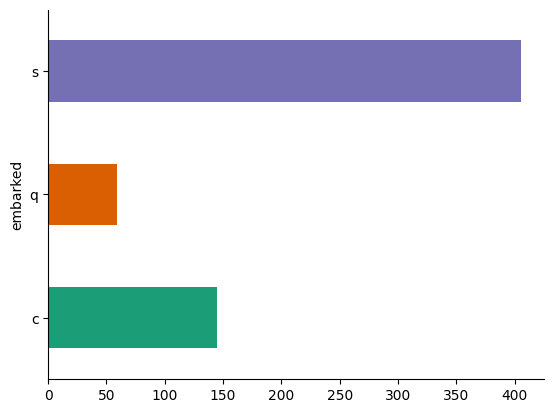

In [421]:
# Importa la librería pyplot de matplotlib para la creación de gráficos.
from matplotlib import pyplot as plt

# Importa la librería seaborn para visualizaciones de datos mejoradas.
import seaborn as sns

# Agrupa el DataFrame por la columna 'sex', cuenta los valores y crea un gráfico de barras horizontal.
df_csv.groupby('embarked').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Oculta los bordes superior y derecho del gráfico para una apariencia más limpia.
plt.gca().spines[['top', 'right',]].set_visible(False)


In [422]:
#valores unicos de sex
df_csv['embarked'].unique()

['s', 'c', NaN, 'q']
Categories (3, object): ['c', 'q', 's']

In [423]:
# Convierte el texto a minúsculas y elimina espacios en blanco para estandarizar la columna 'sex'.
df_csv['embarked'] = df_csv['embarked'].str.lower().str.strip()

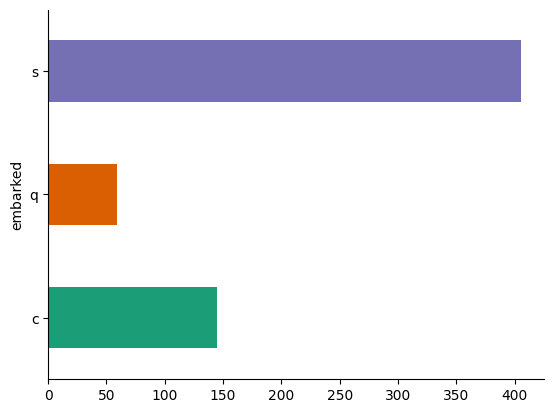

In [424]:
#Importa la librería pyplot de matplotlib para la creación de gráficos.
from matplotlib import pyplot as plt

# Importa la librería seaborn para visualizaciones de datos mejoradas.
import seaborn as sns

# Agrupa el DataFrame por la columna 'sex', cuenta los valores y crea un gráfico de barras horizontal.
df_csv.groupby('embarked').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Oculta los bordes superior y derecho del gráfico para una apariencia más limpia.
plt.gca().spines[['top', 'right',]].set_visible(False)


In [425]:
# Muestra un resumen conciso del DataFrame `df_csv` para verificar los tipos de datos y valores no nulos.
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      630 non-null    category
 1   pclass        630 non-null    int64   
 2   sex           630 non-null    category
 3   age           630 non-null    int64   
 4   fare          630 non-null    float64 
 5   embarked      609 non-null    object  
 6   booking_date  630 non-null    object  
 7   ticket        630 non-null    object  
dtypes: category(2), float64(1), int64(2), object(3)
memory usage: 31.1+ KB


In [426]:
#valores unicos de sex
df_csv['embarked'].unique()

array(['s', 'c', nan, 'q'], dtype=object)

In [427]:
# Convierte la columna 'sex' a tipo categórico para optimizar memoria y mejorar el rendimiento.
df_csv['embarked'] = df_csv['embarked'].astype("category")

# Muestra un resumen conciso del DataFrame `df_csv`, incluyendo los tipos de datos actualizados.
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      630 non-null    category
 1   pclass        630 non-null    int64   
 2   sex           630 non-null    category
 3   age           630 non-null    int64   
 4   fare          630 non-null    float64 
 5   embarked      609 non-null    category
 6   booking_date  630 non-null    object  
 7   ticket        630 non-null    object  
dtypes: category(3), float64(1), int64(2), object(2)
memory usage: 27.0+ KB


In [428]:
df_csv.head(20)

,survived,pclass,sex,age,fare,embarked,booking_date,ticket
0,no sobrevivio,1,male,51,10.06,s,08/04/1912,PC 17599
1,sobrevivio,3,male,29,6.08,s,1912-01-02,STON/O2. 3101282
2,no sobrevivio,3,male,22,16.65,s,1912-01-03,STON/O2. 3101282
3,no sobrevivio,3,female,56,3.62,s,01/09/1912,113803
4,no sobrevivio,3,male,9,19.27,c,02/10/1912,113803
5,sobrevivio,3,male,0,13.22,c,26/05/1912,S.O.C. 14879
6,no sobrevivio,3,female,36,10.25,NaN,1912-01-07,113803
7,no sobrevivio,2,male,23,4.15,s,1912-01-08,A/5 21171
8,no sobrevivio,3,male,15,22.44,c,09/06/1912,PC 17599
9,sobrevivio,2,female,0,9.72,q,1912-01-10,S.O.C. 14879


In [429]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      630 non-null    category
 1   pclass        630 non-null    int64   
 2   sex           630 non-null    category
 3   age           630 non-null    int64   
 4   fare          630 non-null    float64 
 5   embarked      609 non-null    category
 6   booking_date  630 non-null    object  
 7   ticket        630 non-null    object  
dtypes: category(3), float64(1), int64(2), object(2)
memory usage: 27.0+ KB


In [430]:
df_csv['embarked']= df_csv['embarked'].replace('NaN','desconocido')

In [435]:
# Muestra un resumen conciso del DataFrame `df_csv` para verificar los tipos de datos y valores no nulos.
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   survived      630 non-null    category
 1   pclass        630 non-null    int64   
 2   sex           630 non-null    category
 3   age           630 non-null    int64   
 4   fare          630 non-null    float64 
 5   embarked      609 non-null    category
 6   booking_date  630 non-null    object  
 7   ticket        630 non-null    object  
dtypes: category(3), float64(1), int64(2), object(2)
memory usage: 27.0+ KB
